In [5]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [6]:
from keras.datasets import imdb
(X_data,y_data),(tt_x,tt_y)=imdb.load_data(num_words=500) #주요 단어 500종만 살린다. 

17473536/17464789 [==============================] - 0s 0us/step


In [7]:
X_data.shape,y_data.shape,tt_x.shape,tt_y.shape #갯수는 같지만 문장의 길이는 다를 수 있다

((25000,), (25000,), (25000,), (25000,))

In [8]:
len(X_data[0]),len(X_data[1]) #문장의 길이 = 단어 갯수 #자주 나온 500개 단어 중에서만 표현한것이므로 기존 단어는 218개가 넘을수 있다

(218, 189)

In [9]:
y_data[:]

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [11]:
t_x.shape,v_x.shape,t_y.shape,v_y.shape

((20000,), (5000,), (20000,), (5000,))

In [12]:
import numpy as np
type(t_x[0])
#np.array() #리스트는 넘파이로 바꿀수 있다

list

In [13]:
import numpy as np
l=np.array([len(x) for x in t_x])

In [14]:
np.max(l) #가장 긴 길이의 문장

1854

In [15]:
np.mean(l),np.median(l) #평균단어 갯수 #중간값

(239.00925, 178.0)

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <a list of 10 Patch objects>)

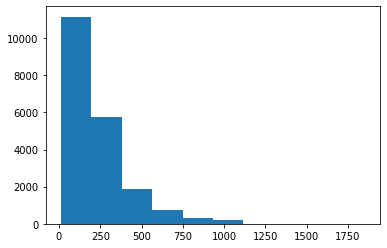

In [16]:
import matplotlib.pyplot as plt
plt.hist(l) #중간값을 평균으로 잡으면 안되는 이유를 보여준다 

In [17]:
from keras.preprocessing.sequence import pad_sequences 
ck=pad_sequences(t_x)
ck.shape

(20000, 1854)

In [ ]:
t_x[0]

In [19]:
ck[0]

array([  0,   0,   0, ...,  10, 470, 158], dtype=int32)

In [20]:
from keras.preprocessing.sequence import pad_sequences 
ck=pad_sequences(t_x,maxlen=100) #갯수를 100개로 지정
ck.shape

(20000, 100)

In [ ]:
t_x[0]

In [22]:
ck[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [23]:
from keras import Sequential
from keras.layers import SimpleRNN,Dense #이진분류 할거임
m=Sequential()
m.add(SimpleRNN(8,input_shape=(100,500))) #뉴런의 갯수 설정 해야함(8) #input_shape에 반드시 주요 단어수를 같이 입력해주어야 한다
m.add(Dense(1,activation='sigmoid')) #아웃풋 갯수는 하나만 출력할것이라 1로 설정

In [24]:
from keras.preprocessing.sequence import pad_sequences 
ck_x=pad_sequences(t_x,maxlen=100) #갯수를 100개로 지정
ck_x.shape

(20000, 100)

In [25]:
from keras.utils.np_utils import to_categorical
c_t_x=to_categorical(ck_x) #이전에는 정답을 찾기위해 y_data에 to_categori 사용  #이번엔 단어가 문장에 있는지 확인해야함
c_t_x.shape

(20000, 100, 500)

In [ ]:
c_t_x[0][0] #첫번째 인덱스 0 : 문장을 꺼내옴 #두번째 인덱스 0 : 단어를 꺼내옴

In [ ]:
c_t_x[0][0][:12] #단어 빈도수가 제일 많은 것을 1로 표현  #0은 out of vocabulary로 취급(상관없는 단어) #위에 0번 인덱스 값이 10이므로 10번째 인덱스가 1로 표현

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

<b><h3>데이터수집

In [ ]:
from keras.datasets import imdb
(X_data,y_data),(tt_x,tt_y)=imdb.load_data(num_words=500)

<b><h3>데이터전처리

In [ ]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(X_data,y_data,test_size=0.2,random_state=42)

<b><h3>패딩

In [ ]:
from keras.preprocessing.sequence import pad_sequences 
ck_t_x=pad_sequences(t_x,maxlen=100)
#ck_tt_x=pad_sequences(tt_x,maxlen=100)
ck_v_x=pad_sequences(v_x,maxlen=100)

In [ ]:
#램을 너무 많이 잡아먹어서 메모리 날리는 작업
#del ck_t_x
#del ck_tt_x
#del ck_v_x
#del t_x
#del v_x
#del tt_x
#del X_data
#del y_data

<b><h3>원핫인코딩(차원을 만드는것)</b></h3><br>
원핫인을 하면 필요한 정보는 1개뿐만 아니라, 나머지 499개 필요없는 정보도 존재한다

In [ ]:
from keras.utils.np_utils import to_categorical
c_t_x=to_categorical(ck_t_x)
#c_tt_x=to_categorical(ck_tt_x)
c_v_x=to_categorical(ck_v_x)

In [ ]:
from keras import Sequential
from keras.layers import SimpleRNN,Dense #이진분류 할거임 #SimpleRNN : 기본 RNN
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
m=Sequential()
m.add(SimpleRNN(8,input_shape=(100,500))) #뉴런의 갯수 설정 해야함(8),뉴런입장에선 셀의 갯수 #input_shape에 반드시 주요 단어수를 같이 입력해주어야 한다 #단층레이어
m.add(Dense(1,activation='sigmoid')) #이진분류

In [ ]:
m.compile(optimizer=RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy']) 
es=EarlyStopping(patience=4,restore_best_weights=True) 
ck=ModelCheckpoint("m.h5")

In [ ]:
hy=m.fit(c_t_x,t_y,validation_data=(c_v_x,v_y),callbacks=[es,ck],batch_size=64,epochs=100) #배치사이즈 2의 배수가 좋다

Epoch 1/100
313/313 [==============================] - 19s 55ms/step - loss: 0.6999 - accuracy: 0.5063 - val_loss: 0.6958 - val_accuracy: 0.5078
Epoch 2/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6906 - accuracy: 0.5308 - val_loss: 0.6858 - val_accuracy: 0.5504
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6624 - accuracy: 0.6137 - val_loss: 0.6450 - val_accuracy: 0.6456
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6291 - accuracy: 0.6683 - val_loss: 0.6206 - val_accuracy: 0.6782
Epoch 5/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6056 - accuracy: 0.6955 - val_loss: 0.6027 - val_accuracy: 0.6930
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5874 - accuracy: 0.7127 - val_loss: 0.5896 - val_accuracy: 0.7026
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5707 - accuracy: 0.7255 - val_loss: 0.5796 - val_ac

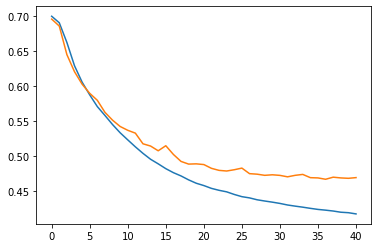

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [ ]:
from keras import Sequential
from keras.layers import SimpleRNN,Dense, Embedding #이진분류 할거임 #SimpleRNN : 기본 RNN #Embedding 레이어 : 원핫인 할 필요없이 차원을 알아서 계산해서 만들어준다
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
m1=Sequential()
m1.add(Embedding(500,16,input_length=100)) #500은 vocabulary 수, 차원의 수
m1.add(SimpleRNN(8,input_shape=(100,500)))
m1.add(Dense(1,activation='sigmoid'))
m1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m1.compile(optimizer=RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy']) 
es=EarlyStopping(patience=3,restore_best_weights=True) 
ck=ModelCheckpoint("m.h5")
hy=m1.fit(ck_t_x,t_y,validation_data=(ck_v_x,v_y),callbacks=[es,ck],batch_size=64,epochs=100) #원핫인코딩을 하기전 패딩만 된 데이터를 가지고 하면 된다. #임배딩레이어가 자동적으로 뿌리게 해준다 #원핫인 안해도 됨 #16차원으로 바꿈

Epoch 1/100
313/313 [==============================] - 10s 29ms/step - loss: 0.6960 - accuracy: 0.5027 - val_loss: 0.6924 - val_accuracy: 0.5232
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6908 - accuracy: 0.5268 - val_loss: 0.6898 - val_accuracy: 0.5336
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6856 - accuracy: 0.5526 - val_loss: 0.6862 - val_accuracy: 0.5500
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6793 - accuracy: 0.5760 - val_loss: 0.6815 - val_accuracy: 0.5658
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6725 - accuracy: 0.5914 - val_loss: 0.6779 - val_accuracy: 0.5690
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6659 - accuracy: 0.6012 - val_loss: 0.6752 - val_accuracy: 0.5728
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6597 - accuracy: 0.6097 - val_loss: 0.6719 - val_accurac

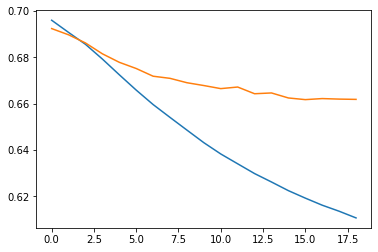

In [ ]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])